In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import json
import gzip
import os
import random
import gc 
print(os.listdir("../image classification"))

['.ipynb_checkpoints', '0', '1', 'blank', 'image classification.ipynb', 'model_keras.h5', 'model_weights.h5', 'pavbhaji.json', 'test.json', 'Untitled1.ipynb']


In [73]:
_pavbhaji = '../image classification/1'
non_pavbhaji = '../image classification/0'
test1 = '../image classification/pavbhaji'


train_pavbhaji =  ['../image classification/1/{}' .format(i) for i in os.listdir(_pavbhaji)]
train_non_pavbhaji =  ['../image classification/0/{}' .format(i) for i in os.listdir(non_pavbhaji)]

test2 = ['../image classification/pavbhaji/{}' .format(i) for i in test1]


32


In [80]:

test_data = test2[:len(test2)//2]
test_data1 = test2[len(test2)//2:]
print(len(test_data))

16


In [81]:
height = 150
width = 150
channels = 3

In [82]:
def process_image(pavbhaji, non_pavbhaji):
    
    X =[]
    y =[]
    
    for image in pavbhaji:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (height,width), interpolation = cv2.INTER_CUBIC))
        y.append(1)
    for image in non_pavbhaji:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (height,width), interpolation = cv2.INTER_CUBIC))
        y.append(0)
    return X, y

In [83]:
X, y = process_image(train_pavbhaji, train_non_pavbhaji)

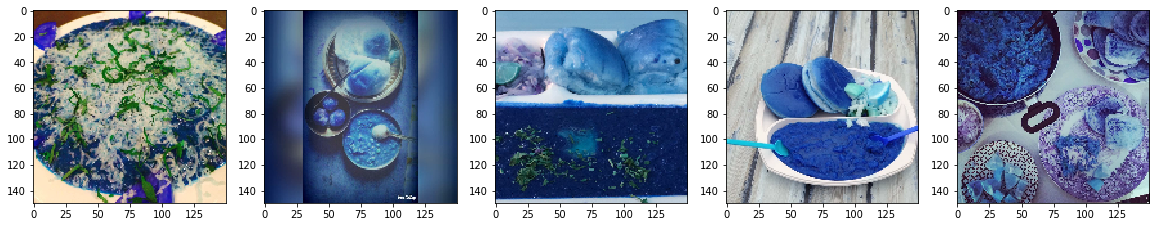

In [84]:
plt.figure(figsize=(20,10))
columns = 5
for i in range(columns):
    plt.subplot(5/columns+1, columns, i+1)
    plt.imshow(X[i])

Text(0.5, 1.0, 'label for non_pavbhaji and pavbhaji')

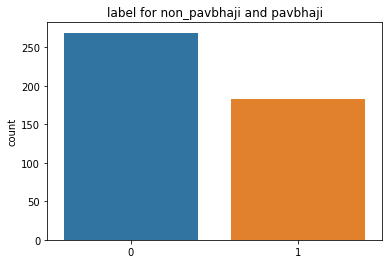

In [7]:
import seaborn as sns
X = np.array(X)
y = np.array(y)
 
sns.countplot(y)
plt.title('label for non_pavbhaji and pavbhaji')

In [8]:
print ("Shape for train data is : ", X.shape)
print ("Shape of labels is: ", y.shape)

Shape for train data is :  (452, 150, 150, 3)
Shape of labels is:  (452,)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("Shape of train images:", X_train.shape)
print("Shape of test images:", X_test.shape)
print("Shape of labels images:", y_train.shape)
print("Shape of labels images:", y_test.shape)

Shape of train images: (361, 150, 150, 3)
Shape of test images: (91, 150, 150, 3)
Shape of labels images: (361,)
Shape of labels images: (91,)


In [10]:
del X
del y
gc.collect()

30

In [11]:
len_train = len(X_train)
len_test = len(X_test)
batch_size = 16

In [12]:
from keras import layers
from keras import models
from keras import optimizers

from keras import preprocessing
from keras.preprocessing.image import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [13]:
import warnings
warnings.filterwarnings('ignore')

model = models.Sequential() 
model.add(layers.Conv2D(32, (2, 2), input_shape=(150, 150, 3)) )
model.add(layers.Activation('relu')) 
model.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model.add(layers.Conv2D(32, (2, 2))) 
model.add(layers.Activation('relu')) 
model.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model.add(layers.Conv2D(64, (2, 2))) 
model.add(layers.Activation('relu')) 
model.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dense(64)) 
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(1)) 
model.add(layers.Activation('sigmoid'))

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 149, 149, 32)      416       
_________________________________________________________________
activation_1 (Activation)    (None, 149, 149, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 73, 73, 32)        4128      
_________________________________________________________________
activation_2 (Activation)    (None, 73, 73, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
______________________

In [14]:
import warnings
warnings.filterwarnings('ignore')

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   featurewise_center=True,
                                   featurewise_std_normalization=True,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=(batch_size))
test_generator = test_datagen.flow(X_test, y_test, batch_size=(batch_size))

In [17]:
import warnings
warnings.filterwarnings('ignore')

history = model.fit_generator(train_generator,
                              steps_per_epoch=len_train  // batch_size,
                              epochs = 60,
                              validation_data=test_generator,
                              validation_steps=len_test  // batch_size)




Epoch 1/60





22/22 [==============================] - 22s 997ms/step - loss: 0.9366 - acc: 0.4943 - val_loss: 0.6821 - val_acc: 0.5375
Epoch 2/60
22/22 [==============================] - 19s 866ms/step - loss: 0.6789 - acc: 0.5764 - val_loss: 0.7154 - val_acc: 0.5600
Epoch 3/60
22/22 [==============================] - 19s 853ms/step - loss: 0.6753 - acc: 0.5927 - val_loss: 0.6462 - val_acc: 0.6400
Epoch 4/60
22/22 [==============================] - 20s 895ms/step - loss: 0.6756 - acc: 0.6048 - val_loss: 0.6590 - val_acc: 0.6133
Epoch 5/60
22/22 [==============================] - 19s 857ms/step - loss: 0.6711 - acc: 0.5842 - val_loss: 0.6686 - val_acc: 0.5733
Epoch 6/60
22/22 [==============================] - 19s 849ms/step - loss: 0.6555 - acc: 0.5871 - val_loss: 0.6412 - val_acc: 0.5867
Epoch 7/60
22/22 [==============================] - 19s 855ms/step - loss: 0.6743 - acc: 0.6113 - val_loss: 0.6762 - val_acc: 0.6000
Epoch 8/60
22/22 [==============================] - 19s 851ms

In [18]:
model.save_weights('model_weights.h5')
model.save('model_keras.h5')

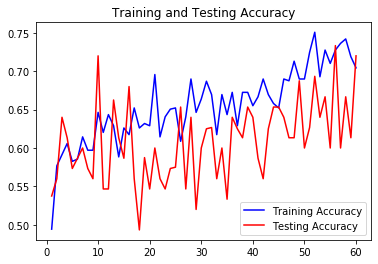

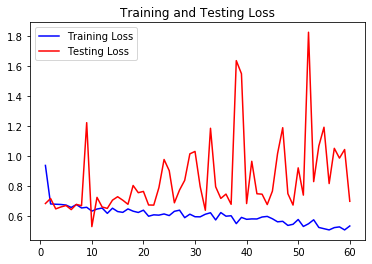

In [19]:
acc = history.history['acc']
test_acc = history.history['val_acc']
loss = history.history['loss']
test_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, test_acc, 'r', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()


plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, test_loss, 'r', label='Testing Loss')
plt.title('Training and Testing Loss')
plt.legend()

plt.show()